In [81]:
# melakukan import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score

In [82]:
# to visualise al the columns in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Main Dataset
Data Application Train

In [83]:
# data application train
df_train = pd.read_csv("application_train.csv", sep=',')
print('Pada dataset ini terdapat %d baris dan %d kolom.\n' % df_train.shape)
df_train.head()

Pada dataset ini terdapat 307511 baris dan 122 kolom.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Dataset application train memiliki 307.511 baris yang memuat informasi terkait pinjaman dan terdapat 122 kolom sebagai features.
Pada kolom TARGET, angka 1 menunjukkan jika klien mengalami kesulitan pembayaran yang berarti dia memiliki keterlambatan pembayaran lebih dari X hari pada setidaknya satu dari cicilan pinjaman Y pertama. Sedangkan angka 0 mewakili semua kasus lainnya.

# Exploratory Data Analysis (EDA)
Cek tipe data

In [84]:
print('Tipe data: \n')
df_train.info(verbose=True)

Tipe data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int

In [85]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [86]:
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [87]:
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [88]:
# Cek missing data
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [89]:
missing_values_table(df_train).head(15)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Melakukan visualisasi

In [90]:
train = df_train.copy()

Univariate : Jumlah pelanggan berdasarkan kemampuan dalam melakukan pembayaran

In [91]:
decode_map = {0: "Tidak ada kesulitan dalam pembayaran", 1: "Kesulitan dalam pembayaran"}
def decode_sentiment(label):
    return decode_map[int(label)]

train['TARGET'] = train['TARGET'].apply(lambda x: decode_sentiment(x))

In [92]:
target_grp = (train[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_grp.style.background_gradient(cmap='YlGnBu')

,TARGET,COUNT
0,Tidak ada kesulitan dalam pembayaran,282686
1,Kesulitan dalam pembayaran,24825


In [93]:
grp = train['TARGET'].value_counts(normalize=True)
grp.reset_index().style.background_gradient(cmap='YlGnBu')

,index,TARGET
0,Tidak ada kesulitan dalam pembayaran,0.919271
1,Kesulitan dalam pembayaran,0.080729


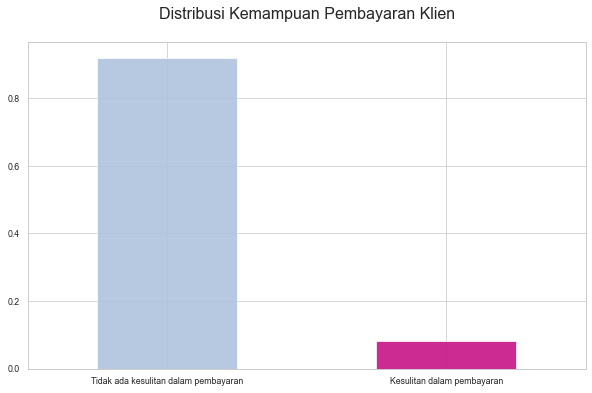

In [94]:
fig = plt.figure(figsize = (10,6))
grp.plot(kind='bar', color= ['lightsteelblue','mediumvioletred'], alpha = 0.9, rot=0)
plt.title('Distribusi Kemampuan Pembayaran Klien\n', fontsize=16)
plt.show()

Berdasarkan hasil perhitungan, dalam dataset ini terdapat 282.686 atau sekitar 92% peminjam dengan TARGET = 0. Hal ini menunjukkan bahwa klien tidak memiliki masalah dalam membayar kembali pinjaman pada waktu tertentu. Sedangkan 24.825 atau sekitar 8% dari total pinjaman berupa klien yang memiliki masalah dalam mengembalikan pinjaman.

Berdasarkan penjelasan tersebut, kumpulan dataset ini tidak seimbang dan memerlukan perlakuan khusus berupa pengambilan sampel ulang. Oleh karena itu, tahap resampling akan dilakukan pada bagian model building.

# Bivariate: Melakukan visualisasi terhadap hubungan antara data kategorik dengan feature Target

<AxesSubplot:title={'center':'\nKemampuan Pembayaran Klien By Realty Ownership Status\n'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

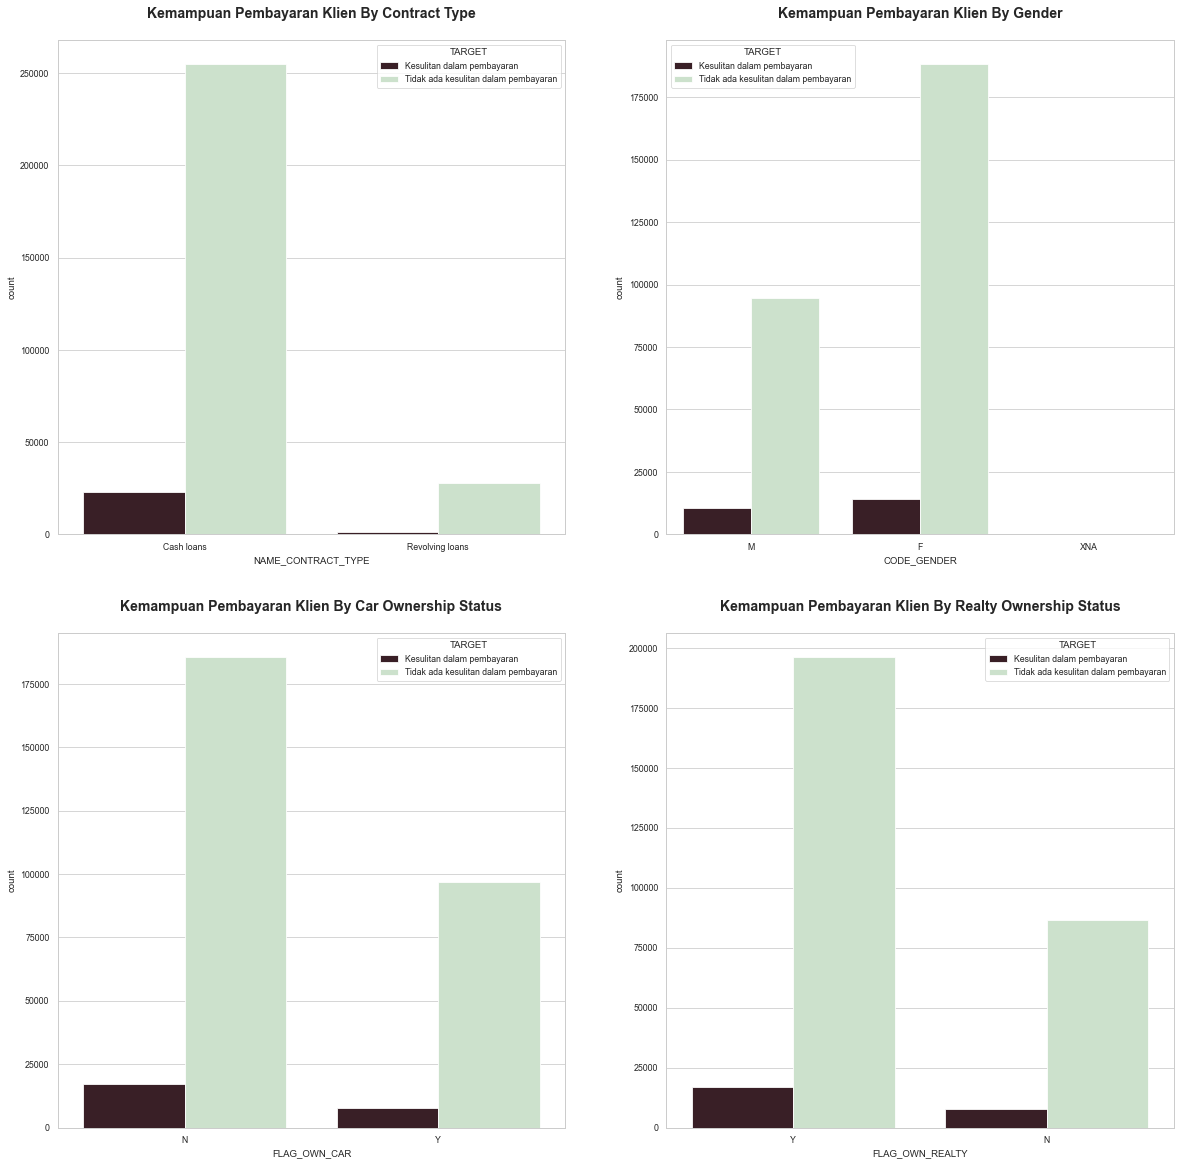

In [95]:
# Visualization 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(20,20))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Kemampuan Pembayaran Klien By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=7.2,rot=-.9_r', ax=ax[0][0])

ax[0][1].set_title('Kemampuan Pembayaran Klien By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = train, hue = 'TARGET', palette = 'ch:start=7.2,rot=-.9_r', ax=ax[0][1])

ax[1][0].set_title('\nKemampuan Pembayaran Klien By Car Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data = train, hue = 'TARGET', palette = 'ch:start=7.2,rot=-.9_r', ax=ax[1][0])

ax[1][1].set_title('\nKemampuan Pembayaran Klien By Realty Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data = train, hue = 'TARGET', palette = 'ch:start=7.2,rot=-.9_r', ax=ax[1][1])

In [96]:
# Contract Type vs Target
contract = train.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien By Contract Type')
contract.sort_values(by='SK_ID_CURR', ascending=False)
contract.style.background_gradient(cmap='Greens')

Kemampuan Pembayaran Klien By Contract Type


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,Kesulitan dalam pembayaran,23221
1,Cash loans,Tidak ada kesulitan dalam pembayaran,255011
2,Revolving loans,Kesulitan dalam pembayaran,1604
3,Revolving loans,Tidak ada kesulitan dalam pembayaran,27675


Total cash loans: 278.232 pinjaman
Total revolving loans: 29.279 pinjaman

Berdasarkan hasil perhitungan, terdapat 278.232 pinjaman tunai sedangkan pinjaman bergulir memiliki jumlah yang jauh lebih rendah yaitu 29.279 pinjaman.

Text(0.5, 0, '\nContract Type')

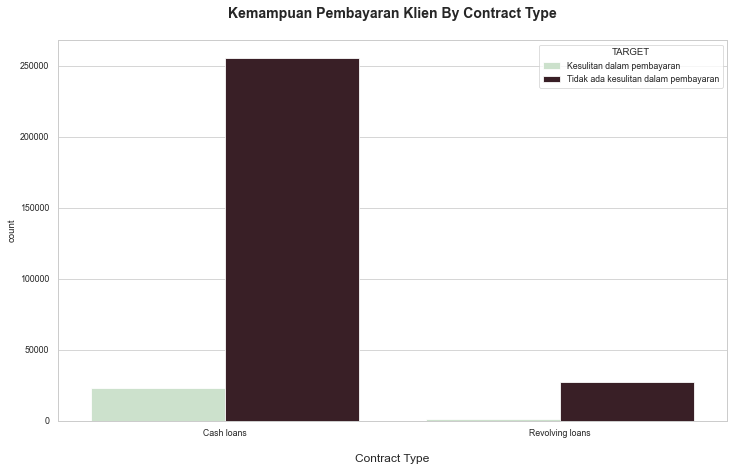

In [97]:
# Visualization Contract Type vs Target
plt.figure(figsize=(12,7))
fig = sns.countplot(x='NAME_CONTRACT_TYPE', data = train, hue = 'TARGET', palette = "ch:s=7.2,rot=-.9")
plt.title('Kemampuan Pembayaran Klien By Contract Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nContract Type', fontsize=12)

In [98]:
# Gender vs Target
gender = train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien By Gender')
gender.sort_values(by='SK_ID_CURR', ascending=False)
gender.style.background_gradient(cmap='Greens')

Kemampuan Pembayaran Klien By Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,F,Kesulitan dalam pembayaran,14170
1,F,Tidak ada kesulitan dalam pembayaran,188278
2,M,Kesulitan dalam pembayaran,10655
3,M,Tidak ada kesulitan dalam pembayaran,94404
4,XNA,Tidak ada kesulitan dalam pembayaran,4


In [99]:
df_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


Terlihat bahwa gender yang paling banyak mengajukan pinjaman ialah F (Female/Perempuan). Terdapat 202.448 pinjaman yang diajukan oleh perempuan, sedangkan 105.059 pinjaman diajukan oleh laki-laki (M/Male).
Namun, dilihat dari persentase yakni sekitar 10% laki-laki memiliki masalah dalam membayar pinjaman dibandingkan dengan peminjam perempuan yang hanya 7% saja yang memiliki masalah dalam membayar.

Text(0.5, 0, '\nCode Gender')

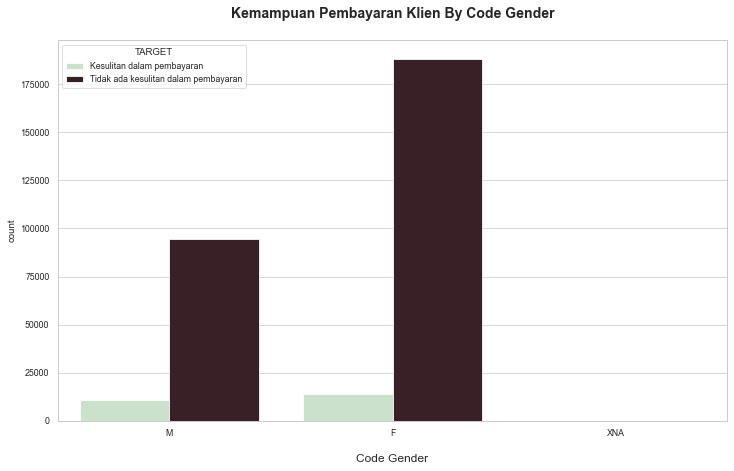

In [100]:
# Visualization Gender vs Target
plt.figure(figsize=(12,7))
fig = sns.countplot(x='CODE_GENDER', data = train, hue = 'TARGET', palette = "ch:s=7.2,rot=-.9")
plt.title('Kemampuan Pembayaran Klien By Code Gender\n', fontweight='bold', fontsize=14)
plt.xlabel('\nCode Gender', fontsize=12)

In [101]:
# Own Car vs Target
owncar = train.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien By Car Ownership Status')
owncar.sort_values(by='SK_ID_CURR', ascending=False)
owncar.style.background_gradient(cmap='Greens')

Kemampuan Pembayaran Klien By Car Ownership Status


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,N,Kesulitan dalam pembayaran,17249
1,N,Tidak ada kesulitan dalam pembayaran,185675
2,Y,Kesulitan dalam pembayaran,7576
3,Y,Tidak ada kesulitan dalam pembayaran,97011


In [102]:
df_train[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


Simbol N berarti No (tidak).
Simbol Y berarti Yes (ya).
Terlihat bahwa mayoritas klien tidak memiliki mobil. Terdapat sekitar 8% klien yang tidak memiliki mobil mengalami kesulitan dalam mengembalikan pinjaman sedangkan klien yang memiliki mobil yakni sekitar 7% saja. 

Text(0.5, 0, '\nOwn Car')

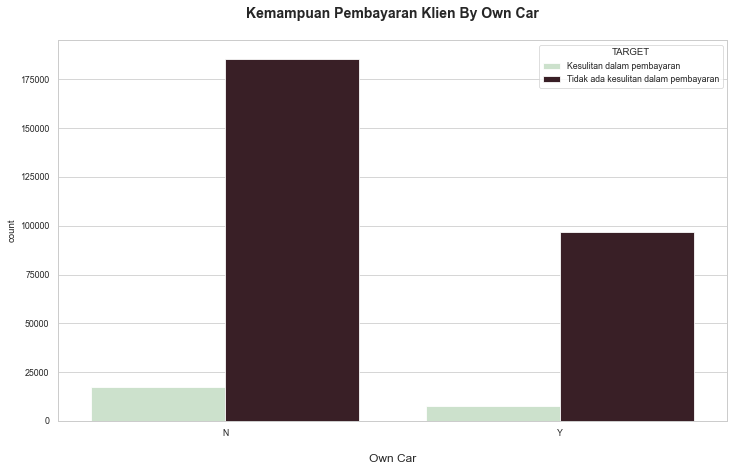

In [103]:
# Visualization Own Car vs Target
plt.figure(figsize=(12,7))
fig = sns.countplot(x='FLAG_OWN_CAR', data = train, hue = 'TARGET', palette = "ch:s=7.2,rot=-.9")
plt.title('Kemampuan Pembayaran Klien By Own Car\n', fontweight='bold', fontsize=14)
plt.xlabel('\nOwn Car', fontsize=12)

In [104]:
# Own Realty vs Target
ownrealty = train.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien By Realty Ownership Status')
ownrealty.sort_values(by='SK_ID_CURR', ascending=False)
ownrealty.style.background_gradient(cmap='Greens')

Kemampuan Pembayaran Klien By Realty Ownership Status


,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,N,Kesulitan dalam pembayaran,7842
1,N,Tidak ada kesulitan dalam pembayaran,86357
2,Y,Kesulitan dalam pembayaran,16983
3,Y,Tidak ada kesulitan dalam pembayaran,196329


In [105]:
df_train[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


Simbol N berarti No (tidak).
Simbol Y berarti Yes (ya).
Terlihat bahwa mayoritas klien memiliki house/flat. Terdapat sekitar 8% klien yang tidak memiliki house/flat mengalami kesulitan dalam mengembalikan pinjaman sedangkan klien yang memiliki house/flat yakni sekitar 8% saja. 

Text(0.5, 0, '\nOwn Realty')

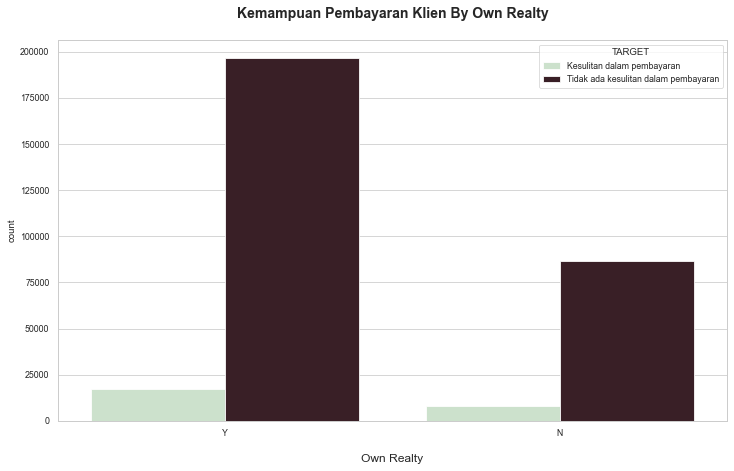

In [106]:
# Visualization Own Realty vs Target
plt.figure(figsize=(12,7))
fig = sns.countplot(x='FLAG_OWN_REALTY', data = train, hue = 'TARGET', palette = "ch:s=7.2,rot=-.9")
plt.title('Kemampuan Pembayaran Klien By Own Realty\n', fontweight='bold', fontsize=14)
plt.xlabel('\nOwn Realty', fontsize=12)

In [107]:
# Type Suite vs Target
typesuite = train.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien By Suite Type')
typesuite.sort_values(by='SK_ID_CURR', ascending=False)
typesuite.style.background_gradient(cmap='Greens')

Kemampuan Pembayaran Klien By Suite Type


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
0,Children,Kesulitan dalam pembayaran,241
1,Children,Tidak ada kesulitan dalam pembayaran,3026
2,Family,Kesulitan dalam pembayaran,3009
3,Family,Tidak ada kesulitan dalam pembayaran,37140
4,Group of people,Kesulitan dalam pembayaran,23
5,Group of people,Tidak ada kesulitan dalam pembayaran,248
6,Other_A,Kesulitan dalam pembayaran,76
7,Other_A,Tidak ada kesulitan dalam pembayaran,790
8,Other_B,Kesulitan dalam pembayaran,174
9,Other_B,Tidak ada kesulitan dalam pembayaran,1596


In [108]:
df_train[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098305
3,Other_A,0.087760
2,Group of people,0.084871
6,Unaccompanied,0.081830
5,"Spouse, partner",0.078716
1,Family,0.074946
0,Children,0.073768


Berdasarkan hasil perhitungan, terlihat bahwa klien yang didampingi oleh Other_B pada saat mengajukan pinjaman memiliki 
persentase kesulitan dalam pengembalian pinjaman paling tinggi yakni sekitar 10% jika dibandingkan dengan peminjaman yang lainnya.

Text(0.5, 0, '\nType Suite')

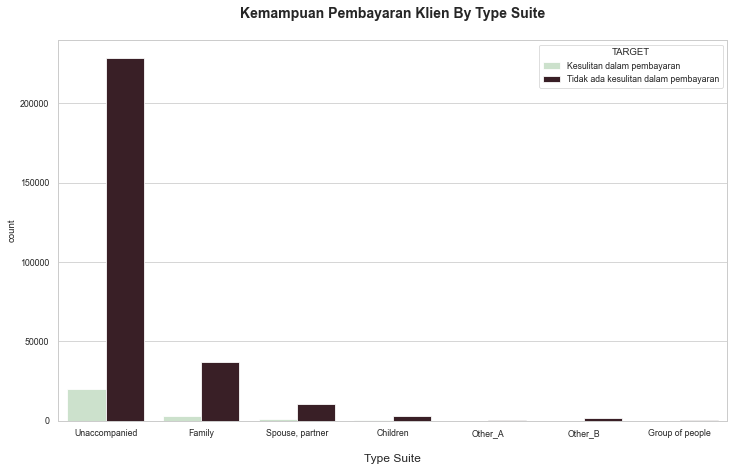

In [109]:
# Visualization Type Suite vs Target
plt.figure(figsize=(12,7))
fig = sns.countplot(x='NAME_TYPE_SUITE', data = train, hue = 'TARGET', palette = "ch:s=7.2,rot=-.9")
plt.title('Kemampuan Pembayaran Klien By Type Suite\n', fontweight='bold', fontsize=14)
plt.xlabel('\nType Suite', fontsize=12)

In [110]:
# Income Type vs Target
income = train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien By Income Type')
income.sort_values(by='SK_ID_CURR', ascending=False)
income.style.background_gradient(cmap='Greens')

Kemampuan Pembayaran Klien By Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,Tidak ada kesulitan dalam pembayaran,10
1,Commercial associate,Kesulitan dalam pembayaran,5360
2,Commercial associate,Tidak ada kesulitan dalam pembayaran,66257
3,Maternity leave,Kesulitan dalam pembayaran,2
4,Maternity leave,Tidak ada kesulitan dalam pembayaran,3
5,Pensioner,Kesulitan dalam pembayaran,2982
6,Pensioner,Tidak ada kesulitan dalam pembayaran,52380
7,State servant,Kesulitan dalam pembayaran,1249
8,State servant,Tidak ada kesulitan dalam pembayaran,20454
9,Student,Tidak ada kesulitan dalam pembayaran,18


In [111]:
df_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


Terlihat bahwa klien dengan jenis penghasilan berupa bussinessman dan student tidak mengalami kesulitan dalam mengembalikan pinjamannya.
Klien yang paling banyak mengajukan pinjaman adalah klien yang memiliki penghasilan jenis working sebanyak 158.774 pinjaman.
Klien dengan jenis penghasilan berupa maternity leave dan unemployed memiliki persentase tertinggi terkait mengalami masalah dalam pengembalian pinjaman yakni masing-masing sebesar 40% dan 36%.

Text(0.5, 0, '\nIncome Type')

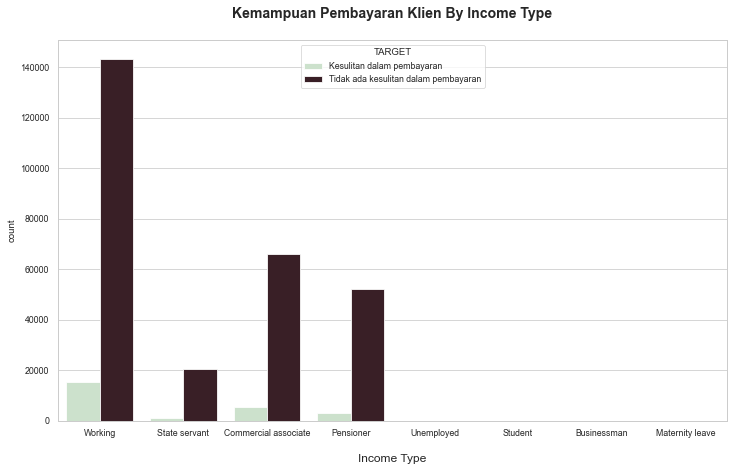

In [112]:
# Visualization Income Type vs Target
plt.figure(figsize=(12,7))
fig = sns.countplot(x='NAME_INCOME_TYPE', data = train, hue = 'TARGET', palette = "ch:s=7.2,rot=-.9")
plt.title('Kemampuan Pembayaran Klien By Income Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nIncome Type', fontsize=12)

In [113]:
# Education Type vs Target
edu = train.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien By Education Type')
edu.sort_values(by='SK_ID_CURR', ascending=False)
edu.style.background_gradient(cmap='Greens')

Kemampuan Pembayaran Klien By Education Type


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
0,Academic degree,Kesulitan dalam pembayaran,3
1,Academic degree,Tidak ada kesulitan dalam pembayaran,161
2,Higher education,Kesulitan dalam pembayaran,4009
3,Higher education,Tidak ada kesulitan dalam pembayaran,70854
4,Incomplete higher,Kesulitan dalam pembayaran,872
5,Incomplete higher,Tidak ada kesulitan dalam pembayaran,9405
6,Lower secondary,Kesulitan dalam pembayaran,417
7,Lower secondary,Tidak ada kesulitan dalam pembayaran,3399
8,Secondary / secondary special,Kesulitan dalam pembayaran,19524
9,Secondary / secondary special,Tidak ada kesulitan dalam pembayaran,198867


In [114]:
df_train[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


Berdasarkan hasil perhitungan terlihat bahwa sebanyak 218.391 klien yang mengajukan pinjaman ialah dari secondary/secondary special education kemudian diikuti oleh higher education yakni sebanyak 74.863 peminjam.
Klien dengan lower secondary education memiliki persentase tertinggi yakni 11% mengalami masalah dalam pengembalian pinjaman.

Text(0.5, 0, '\nEducation Type')

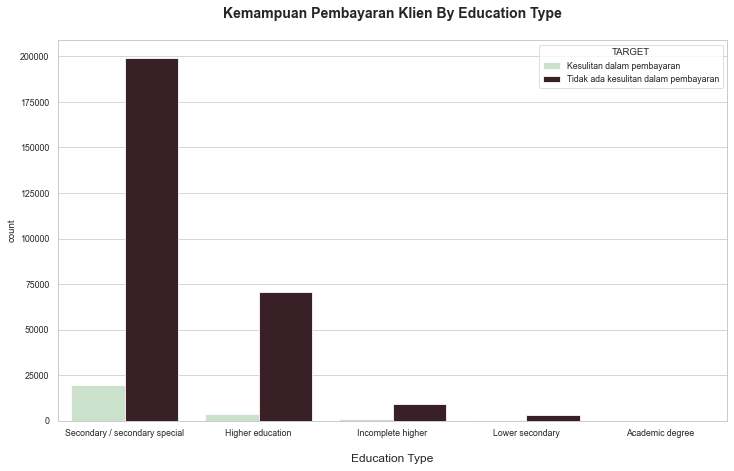

In [115]:
# Visualization Education Type vs Target
plt.figure(figsize=(12,7))
fig = sns.countplot(x='NAME_EDUCATION_TYPE', data = train, hue = 'TARGET', palette = "ch:s=7.2,rot=-.9")
plt.title('Kemampuan Pembayaran Klien By Education Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nEducation Type', fontsize=12)

In [116]:
# Family Status vs Target
fam = train.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien By Family Status')
fam.sort_values(by='SK_ID_CURR', ascending=False)
fam.style.background_gradient(cmap='Greens')

Kemampuan Pembayaran Klien By Family Status


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,Kesulitan dalam pembayaran,2961
1,Civil marriage,Tidak ada kesulitan dalam pembayaran,26814
2,Married,Kesulitan dalam pembayaran,14850
3,Married,Tidak ada kesulitan dalam pembayaran,181582
4,Separated,Kesulitan dalam pembayaran,1620
5,Separated,Tidak ada kesulitan dalam pembayaran,18150
6,Single / not married,Kesulitan dalam pembayaran,4457
7,Single / not married,Tidak ada kesulitan dalam pembayaran,40987
8,Unknown,Tidak ada kesulitan dalam pembayaran,2
9,Widow,Kesulitan dalam pembayaran,937


In [117]:
df_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


Berdasarkan hasil perhitungan terlihat bahwa sebanyak 196.432 klien dengan status married mengajukan sebagian besar pinjaman.
Klien dengan status civil marriage dan single/not married memiliki persentase tertinggi yakni masing-masing sekitar 10% dari klien yang memiliki masalah dalam pengembalian pinjaman.

Text(0.5, 0, '\nFamily Status')

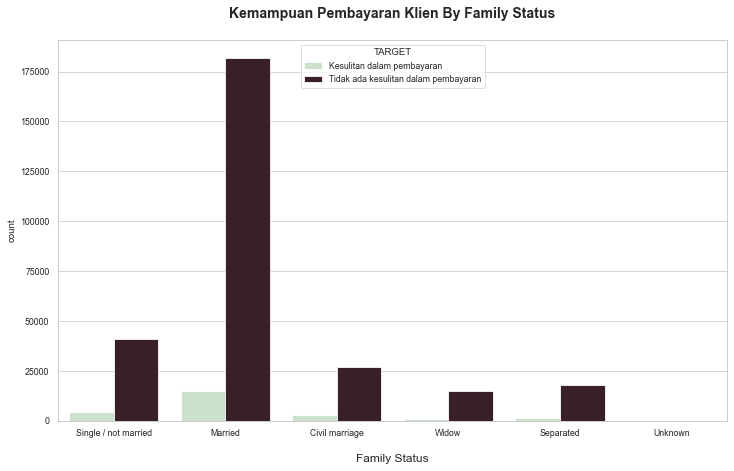

In [118]:
# Visualization Family Status vs Target
plt.figure(figsize=(12,7))
fig = sns.countplot(x='NAME_FAMILY_STATUS', data = train, hue = 'TARGET', palette = "ch:s=7.2,rot=-.9")
plt.title('Kemampuan Pembayaran Klien By Family Status\n', fontweight='bold', fontsize=14)
plt.xlabel('\nFamily Status', fontsize=12)

In [119]:
# House Type vs Target
house = train.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien By Housing Type')
house.sort_values(by='SK_ID_CURR', ascending=False)
house.style.background_gradient(cmap='Greens')

Kemampuan Pembayaran Klien By Housing Type


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,Kesulitan dalam pembayaran,89
1,Co-op apartment,Tidak ada kesulitan dalam pembayaran,1033
2,House / apartment,Kesulitan dalam pembayaran,21272
3,House / apartment,Tidak ada kesulitan dalam pembayaran,251596
4,Municipal apartment,Kesulitan dalam pembayaran,955
5,Municipal apartment,Tidak ada kesulitan dalam pembayaran,10228
6,Office apartment,Kesulitan dalam pembayaran,172
7,Office apartment,Tidak ada kesulitan dalam pembayaran,2445
8,Rented apartment,Kesulitan dalam pembayaran,601
9,Rented apartment,Tidak ada kesulitan dalam pembayaran,4280


In [120]:
df_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


Terlihat bahwa klien dengan tipe rumah rented apartment memiliki persentase tertinggi yakni 12% dan kesulitan dalam melakukan pengembalian pinjaman.
Klien dengan tipe rumah house/apartment memiliki pengajuan pinjaman tertinggi yakni sebanyak 272.868 peminjam.

Text(0.5, 0, '\nHousing Type')

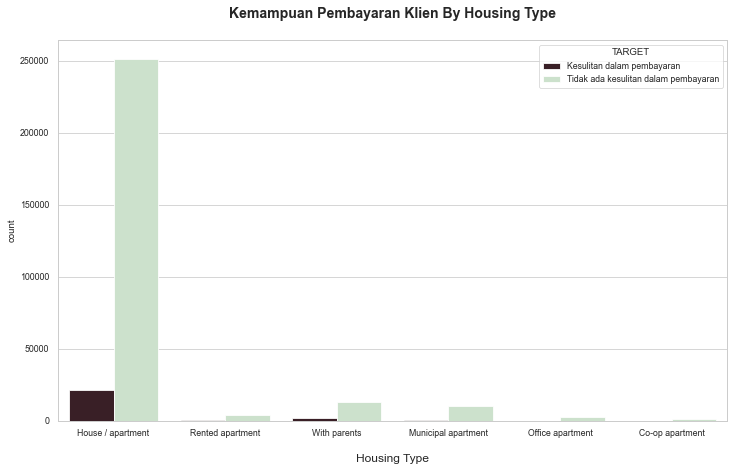

In [121]:
# Visualization Housing Type vs Target
plt.figure(figsize=(12,7))
fig = sns.countplot(x='NAME_HOUSING_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=7.2,rot=-.9_r')
plt.title('Kemampuan Pembayaran Klien By Housing Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nHousing Type', fontsize=12)

In [122]:
# Occupation Type vs Target
occ = train.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Occupation Type')
occ.sort_values(by='SK_ID_CURR', ascending=False)
occ.style.background_gradient(cmap='Greens')

Clients Repayment Abilities By Occupation Type


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,Kesulitan dalam pembayaran,474
1,Accountants,Tidak ada kesulitan dalam pembayaran,9339
2,Cleaning staff,Kesulitan dalam pembayaran,447
3,Cleaning staff,Tidak ada kesulitan dalam pembayaran,4206
4,Cooking staff,Kesulitan dalam pembayaran,621
5,Cooking staff,Tidak ada kesulitan dalam pembayaran,5325
6,Core staff,Kesulitan dalam pembayaran,1738
7,Core staff,Tidak ada kesulitan dalam pembayaran,25832
8,Drivers,Kesulitan dalam pembayaran,2107
9,Drivers,Tidak ada kesulitan dalam pembayaran,16496


In [123]:
df_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


Terlihat bahwa sebagian besar pinjaman diajukan oleh klien dengan laborers occupation yakni sebanyak 55.186 peminjam.
Klien dengan occupation sebagai low-laborers memiliki persentase tertinggi yakni 17% dalam mengalami kendala untuk pengembalian pinjaman.

Text(0.5, 0, '\nOccupation Type')

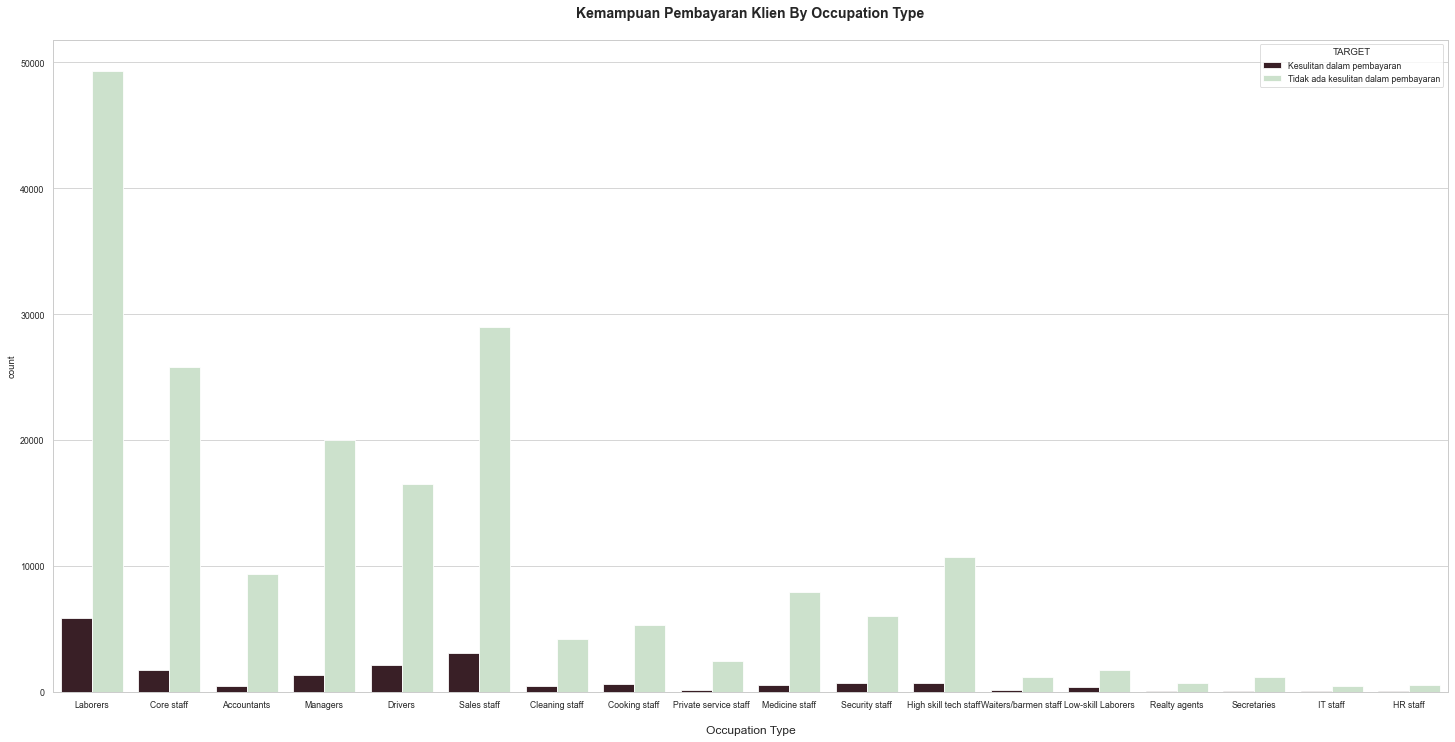

In [124]:
# Visualization Occupation Type vs Target
plt.figure(figsize=(25,12))
fig = sns.countplot(x='OCCUPATION_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=7.2,rot=-.9_r')
plt.title('Kemampuan Pembayaran Klien By Occupation Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nOccupation Type', fontsize=12)

In [125]:
# Process Day vs Target
day = train.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Process Day')
day.sort_values(by='SK_ID_CURR', ascending=False)
day.style.background_gradient(cmap='Greens')

Clients Repayment Abilities By Process Day


,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
0,FRIDAY,Kesulitan dalam pembayaran,4101
1,FRIDAY,Tidak ada kesulitan dalam pembayaran,46237
2,MONDAY,Kesulitan dalam pembayaran,3934
3,MONDAY,Tidak ada kesulitan dalam pembayaran,46780
4,SATURDAY,Kesulitan dalam pembayaran,2670
5,SATURDAY,Tidak ada kesulitan dalam pembayaran,31182
6,SUNDAY,Kesulitan dalam pembayaran,1283
7,SUNDAY,Tidak ada kesulitan dalam pembayaran,14898
8,THURSDAY,Kesulitan dalam pembayaran,4098
9,THURSDAY,Tidak ada kesulitan dalam pembayaran,46493


In [126]:
df_train[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
5,TUESDAY,0.083505
6,WEDNESDAY,0.081604
0,FRIDAY,0.081469
4,THURSDAY,0.081003
3,SUNDAY,0.079291
2,SATURDAY,0.078873
1,MONDAY,0.077572


Terlihat bahwa setiap harinya pengajuan pinjaman memiliki persentase yang hampir sama yakni sekitar 7%-8% dan mengalami kendala dalam melakukan pengembalian pinjaman.

Text(0.5, 0, '\nProcess Day')

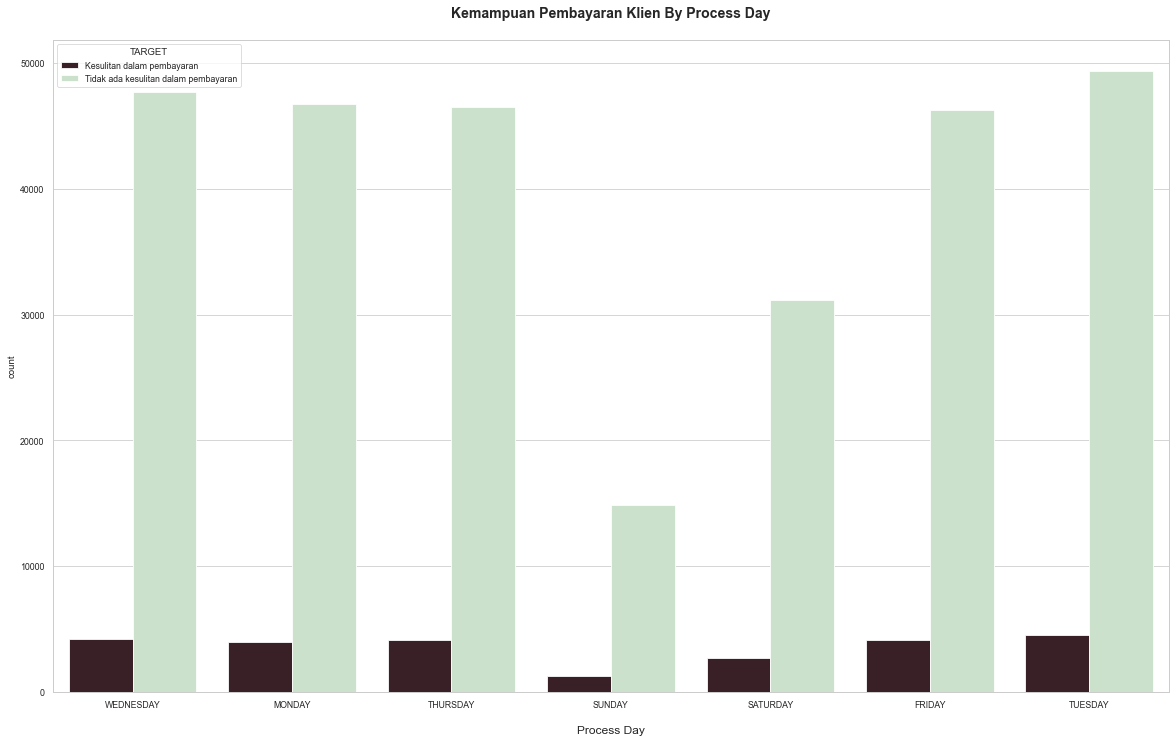

In [127]:
# Visualization Process Day vs Target
plt.figure(figsize=(20,12))
fig = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data = train, hue = 'TARGET', palette = 'ch:start=7.2,rot=-.9_r')
plt.title('Kemampuan Pembayaran Klien By Process Day\n', fontweight='bold', fontsize=14)
plt.xlabel('\nProcess Day', fontsize=12)

In [128]:
# Organization Type vs Target
ot = train.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien By Organization Type')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Greens')

Kemampuan Pembayaran Klien By Organization Type


,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
0,Advertising,Kesulitan dalam pembayaran,35
1,Advertising,Tidak ada kesulitan dalam pembayaran,394
2,Agriculture,Kesulitan dalam pembayaran,257
3,Agriculture,Tidak ada kesulitan dalam pembayaran,2197
4,Bank,Kesulitan dalam pembayaran,130
5,Bank,Tidak ada kesulitan dalam pembayaran,2377
6,Business Entity Type 1,Kesulitan dalam pembayaran,487
7,Business Entity Type 1,Tidak ada kesulitan dalam pembayaran,5497
8,Business Entity Type 2,Kesulitan dalam pembayaran,900
9,Business Entity Type 2,Tidak ada kesulitan dalam pembayaran,9653


In [129]:
df_train[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.157540
18,Industry: type 13,0.134328
25,Industry: type 8,0.125000
38,Restaurant,0.117062
7,Construction,0.116798
6,Cleaning,0.111538
14,Industry: type 1,0.110683
20,Industry: type 3,0.106162
36,Realtor,0.106061
1,Agriculture,0.104727


Terlihat bahwa klien dengan organization type transport: type 3 memiliki persentase tertinggi yakni 16% dan mengalami kendala dalam pengembalian dana.

Text(0.5, 0, '\nOrganization Type')

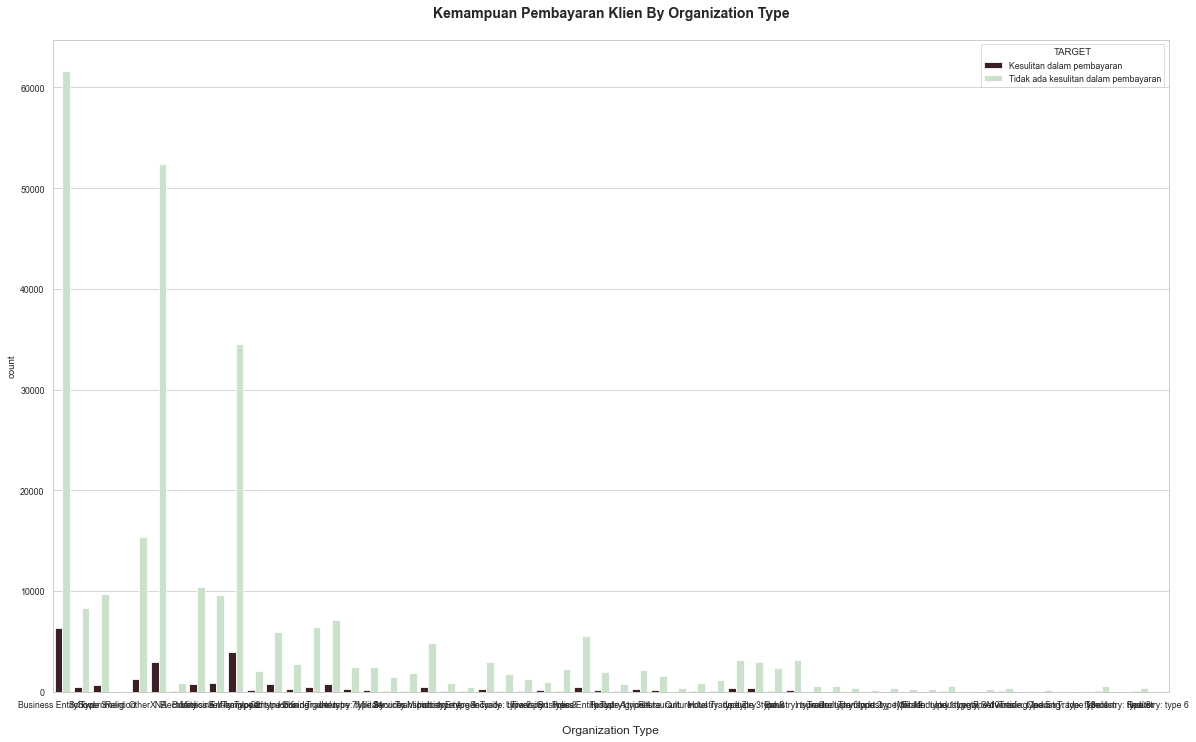

In [130]:
# Visualization Organization Type vs Target
plt.figure(figsize=(20,12))
fig = sns.countplot(x='ORGANIZATION_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=7.2,rot=-.9_r')
plt.title('Kemampuan Pembayaran Klien By Organization Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nOrganization Type', fontsize=12)

# Bivariate: Melakukan visualisasi terhadap hubungan antara data numerik dengan feature Target

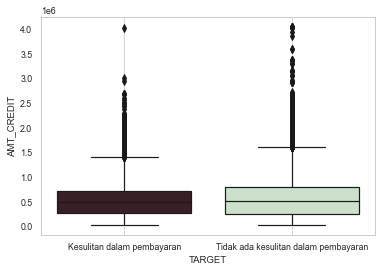

In [131]:
# Amount Credit of the Loan vs Target
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=train, palette = 'ch:start=7.2,rot=-.9_r')
plt.grid()
plt.show()

Terlihat bahwa nilai median pada amount credit klien yang tidak mengalami kesulitan pembayaran sedikit lebih besar jika dibandingkan dengan nilai median klien yang mengalami kesulitan pembayaran. Hal ini menunjukkan bahwa klien dengan amount credit yang lebih tinggi memiliki peluang yang sedikit lebih besar untuk mampu membayar kembali pinjamannya jika dibandingkan dengan klien dengan amount credit yang lebih rendah.

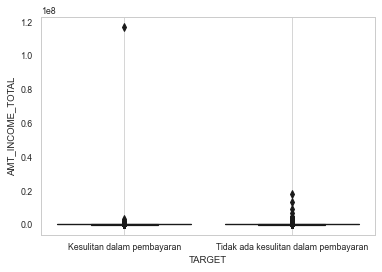

In [132]:
# Amount Income vs Target
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=train, palette = 'ch:start=7.2,rot=-.9_r')
plt.grid()
plt.show()

Terlihat bahwa baik klien yang mengalami kesulitan pembayaran maupun klien yang tidak mengalami kesulitan pembayaran, sebagian besar memiliki nilai yang sama. Namun, dengan meningkatnya pendapatan klien, kemungkinan bahwa klien tidak akan mengalami kesulitan membayar kembali pinjaman juga lebih besar.

In [133]:
# Age vs Target
no_age = df_train[df_train['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = df_train[df_train['TARGET']==1]['DAYS_BIRTH'].values/-365

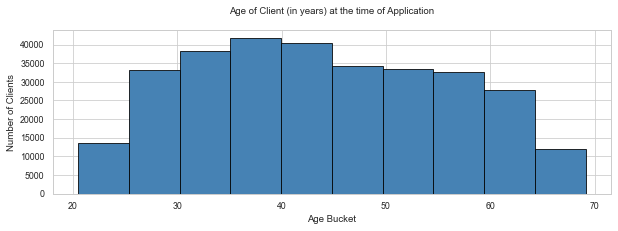

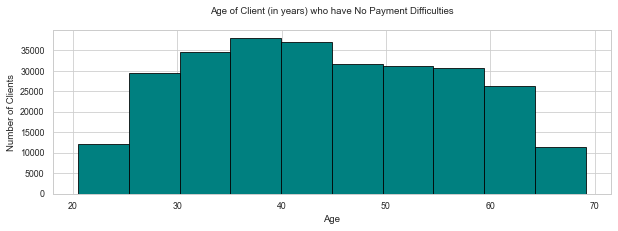

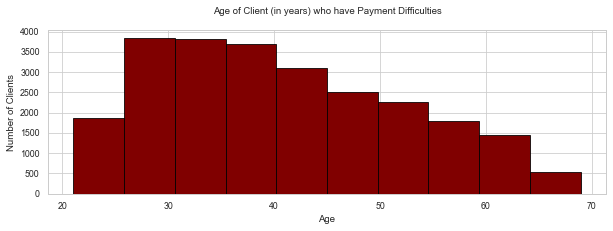

In [134]:
plt.figure(figsize=(10,3))
plt.hist(df_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

Sebagian besar klien yang mengajukan pinjaman berada pada rentang usia 35-40 tahun, diikuti klien pada rentang usia 40-45 tahun. Sementara itu, jumlah pelamar untuk klien berusia <25 tahun atau usia >65 tahun sangat rendah.

Klien yang tidak mengalami kesulitan pembayaran adalah klien dengan rentang usia 35-45 tahun. Sedangkan nasabah yang mengalami kesulitan pembayaran adalah nasabah dengan rentang usia 25-35 tahun.

In [135]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [145]:
# train the model
log_model = LogisticRegression()
print(log_model)

LogisticRegression()
